<a href="https://colab.research.google.com/github/Arnob087/Cvpr-MID/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=5,
                           n_informative=15, n_redundant=5, random_state=42)

Y = np.eye(5)[y]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, lr=0.01):
        self.lr = lr
        self.W1 = np.random.randn(input_size, hidden_sizes[0]) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_sizes[0]))

        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * np.sqrt(2. / hidden_sizes[0])
        self.b2 = np.zeros((1, hidden_sizes[1]))

        self.W3 = np.random.randn(hidden_sizes[1], hidden_sizes[2]) * np.sqrt(2. / hidden_sizes[1])
        self.b3 = np.zeros((1, hidden_sizes[2]))

        self.W4 = np.random.randn(hidden_sizes[2], output_size) * np.sqrt(2. / hidden_sizes[2])
        self.b4 = np.zeros((1, output_size))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def softmax(self, z):
        z -= np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy(self, y_true, y_pred):
        m = y_true.shape[0]
        epsilon = 1e-9
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.sum(y_true * np.log(y_pred)) / m

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.relu(self.Z2)

        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.relu(self.Z3)

        self.Z4 = np.dot(self.A3, self.W4) + self.b4
        self.A4 = self.softmax(self.Z4)

        return self.A4

    def backward(self, X, Y, output):
        m = X.shape[0]
        dZ4 = output - Y
        dW4 = (1/m) * np.dot(self.A3.T, dZ4)
        db4 = (1/m) * np.sum(dZ4, axis=0, keepdims=True)

        dA3 = np.dot(dZ4, self.W4.T)
        dZ3 = dA3 * self.relu_derivative(self.Z3)
        dW3 = (1/m) * np.dot(self.A2.T, dZ3)
        db3 = (1/m) * np.sum(dZ3, axis=0, keepdims=True)

        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * self.relu_derivative(self.Z2)
        dW2 = (1/m) * np.dot(self.A1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

        self.W4 -= self.lr * dW4
        self.b4 -= self.lr * db4
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def train(self, X, Y, epochs=1000):
        losses = []
        for i in range(epochs):
            output = self.forward(X)
            loss = self.cross_entropy(Y, output)
            self.backward(X, Y, output)
            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss:.4f}")
            losses.append(loss)
        return losses

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)


In [ ]:
nn = NeuralNetwork(input_size=20, hidden_sizes=[128, 64, 132], output_size=5, lr=0.01)
losses = nn.train(X_train, Y_train, epochs=1000)


Epoch 0, Loss: 7.6914
Epoch 100, Loss: 0.6408
Epoch 200, Loss: 0.4257
Epoch 300, Loss: 0.3158
Epoch 400, Loss: 0.2452
Epoch 500, Loss: 0.1935
Epoch 600, Loss: 0.1551
Epoch 700, Loss: 0.1261
Epoch 800, Loss: 0.1039
Epoch 900, Loss: 0.0866


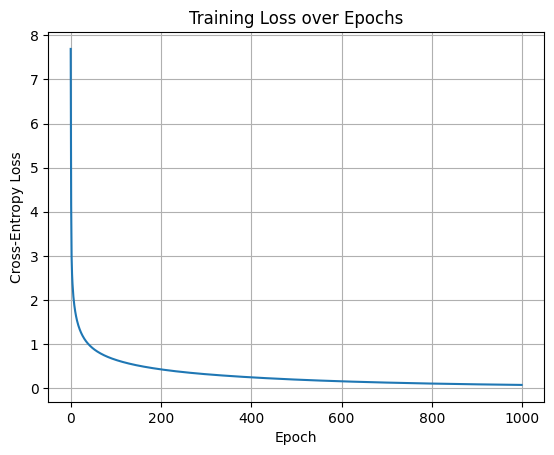

In [ ]:
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.grid(True)
plt.show()


In [ ]:
y_pred = nn.predict(X_test)
y_true = np.argmax(Y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        30
           1       0.78      0.70      0.74        46
           2       0.75      0.75      0.75        44
           3       0.57      0.61      0.59        38
           4       0.73      0.71      0.72        42

    accuracy                           0.68       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.69      0.68      0.68       200

Confusion Matrix:
[[18  2  1  8  1]
 [ 1 32  6  3  4]
 [ 5  2 33  3  1]
 [ 7  2  1 23  5]
 [ 3  3  3  3 30]]
